<a href="https://colab.research.google.com/github/glosophy/WindPowerForecasting/blob/main/windPower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Update Kaggle API:
!pip install --upgrade -q kaggle

# Create a new folder for Kaggle config file:
!mkdir /root/.kaggle

     |████████████████████████████████| 61kB 2.9MB/s 


In [2]:
import json

token = {
    "username": "gsutters",
    "key": "f6e3e60950273a5e86ec3b198c6822c0"
}

with open('/root/.kaggle/kaggle.json', 'w') as config_file:
    json.dump(token, config_file)

In [3]:
# Provide access to Kaggle config file:
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d theforcecoder/wind-power-forecasting

  0% 0.00/7.51M [00:00<?, ?B/s]
100% 7.51M/7.51M [00:00<00:00, 81.9MB/s]


In [39]:
import zipfile

with zipfile.ZipFile('wind-power-forecasting.zip',"r") as zip_ref:
    zip_ref.extractall("data")

In [40]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/Turbine_Data.csv', parse_dates=["Unnamed: 0"])

In [41]:
df['DateTime'] = df['Unnamed: 0'] 
df.drop('Unnamed: 0', axis=1, inplace=True)

In [42]:
# Add datetime parameters 
df['DateTime'] = pd.to_datetime(df['DateTime'], 
 format = '%Y-%m-%dT%H:%M:%SZ', 
 errors = 'coerce')

In [43]:
df

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed,DateTime
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN,2017-12-31 00:00:00+00:00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN,2017-12-31 00:10:00+00:00
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN,2017-12-31 00:20:00+00:00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN,2017-12-31 00:30:00+00:00
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN,2017-12-31 00:40:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118219,70.044465,27.523741,45.711129,1.515669,1.950088,1.950088,0.0,59.821165,55.193793,1029.870744,59.060367,58.148777,39.008931,36.476562,178.0,13.775785,9.234004,2.0,G01,178.0,3.533445,2020-03-30 23:10:00+00:00
118220,40.833474,27.602882,45.598573,1.702809,2.136732,2.136732,0.0,59.142038,54.798545,1030.160478,58.452003,57.550367,39.006759,36.328125,178.0,8.088928,9.229370,2.0,G01,178.0,3.261231,2020-03-30 23:20:00+00:00
118221,20.777790,27.560925,45.462045,1.706214,2.139664,2.139664,0.0,58.439439,54.380456,1030.137822,58.034071,57.099335,39.003815,36.131944,178.0,4.355978,9.236802,2.0,G01,178.0,3.331839,2020-03-30 23:30:00+00:00
118222,62.091039,27.810472,45.343827,1.575352,2.009781,2.009781,0.0,58.205413,54.079014,1030.178178,57.795387,56.847239,39.003815,36.007805,190.0,12.018077,9.237374,2.0,G01,190.0,3.284468,2020-03-30 23:40:00+00:00


In [44]:
# Check for missing values in the dataframe
df.isnull().sum()

ActivePower                     23474
AmbientTemperatue               24407
BearingShaftTemperature         55706
Blade1PitchAngle                76228
Blade2PitchAngle                76333
Blade3PitchAngle                76333
ControlBoxTemperature           56064
GearboxBearingTemperature       55684
GearboxOilTemperature           55786
GeneratorRPM                    55929
GeneratorWinding1Temperature    55797
GeneratorWinding2Temperature    55775
HubTemperature                  55818
MainBoxTemperature              55717
NacellePosition                 45946
ReactivePower                   23476
RotorRPM                        56097
TurbineStatus                   55316
WTG                                 0
WindDirection                   45946
WindSpeed                       23629
DateTime                            0
dtype: int64

In [45]:
df.apply(pd.Series.first_valid_index)

ActivePower                       144
AmbientTemperatue                 144
BearingShaftTemperature         33065
Blade1PitchAngle                70789
Blade2PitchAngle                70789
Blade3PitchAngle                70789
ControlBoxTemperature           33065
GearboxBearingTemperature       33065
GearboxOilTemperature           33065
GeneratorRPM                    33065
GeneratorWinding1Temperature    33065
GeneratorWinding2Temperature    33065
HubTemperature                  33065
MainBoxTemperature              33065
NacellePosition                   144
ReactivePower                     144
RotorRPM                        33065
TurbineStatus                   33073
WTG                                 0
WindDirection                     144
WindSpeed                         144
DateTime                            0
dtype: int64

In [46]:
df = df.iloc[33065:]

In [47]:
df.apply(pd.Series.first_valid_index)

ActivePower                     33065
AmbientTemperatue               33065
BearingShaftTemperature         33065
Blade1PitchAngle                70789
Blade2PitchAngle                70789
Blade3PitchAngle                70789
ControlBoxTemperature           33065
GearboxBearingTemperature       33065
GearboxOilTemperature           33065
GeneratorRPM                    33065
GeneratorWinding1Temperature    33065
GeneratorWinding2Temperature    33065
HubTemperature                  33065
MainBoxTemperature              33065
NacellePosition                 33361
ReactivePower                   33065
RotorRPM                        33065
TurbineStatus                   33073
WTG                             33065
WindDirection                   33361
WindSpeed                       33361
DateTime                        33065
dtype: int64

In [48]:
# Drop Blade1PitchAngle columns due to high number of missing values
df = df.drop(['Blade1PitchAngle', 'Blade2PitchAngle', 'Blade3PitchAngle'], 1)

In [49]:
# Replace missing values with the median
df.fillna(df.mean(), inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


In [50]:
# Check again for missing values in the dataframe
df.isnull().sum()

ActivePower                     0
AmbientTemperatue               0
BearingShaftTemperature         0
ControlBoxTemperature           0
GearboxBearingTemperature       0
GearboxOilTemperature           0
GeneratorRPM                    0
GeneratorWinding1Temperature    0
GeneratorWinding2Temperature    0
HubTemperature                  0
MainBoxTemperature              0
NacellePosition                 0
ReactivePower                   0
RotorRPM                        0
TurbineStatus                   0
WTG                             0
WindDirection                   0
WindSpeed                       0
DateTime                        0
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85159 entries, 33065 to 118223
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   ActivePower                   85159 non-null  float64            
 1   AmbientTemperatue             85159 non-null  float64            
 2   BearingShaftTemperature       85159 non-null  float64            
 3   ControlBoxTemperature         85159 non-null  float64            
 4   GearboxBearingTemperature     85159 non-null  float64            
 5   GearboxOilTemperature         85159 non-null  float64            
 6   GeneratorRPM                  85159 non-null  float64            
 7   GeneratorWinding1Temperature  85159 non-null  float64            
 8   GeneratorWinding2Temperature  85159 non-null  float64            
 9   HubTemperature                85159 non-null  float64            
 10  MainBoxTemperature           

In [52]:
df.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,85159.000000,85159.000000,85159.000000,85159.0,85159.000000,85159.000000,85159.000000,85159.000000,85159.000000,85159.000000,85159.000000,85159.000000,85159.000000,85159.000000,8.515900e+04,85159.000000,85159.000000
mean,592.143554,28.586534,43.010189,0.0,64.234170,57.561217,1102.026269,72.460403,71.826659,36.897978,39.547603,195.152751,93.619100,9.907500,2.280429e+03,195.152751,5.767499
std,556.373120,4.063762,4.751298,0.0,8.960039,5.414931,451.644680,19.373424,19.396334,4.433213,4.911494,67.109293,112.726405,4.030145,3.082131e+05,67.109293,2.337791
min,-38.524659,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-203.182591,0.000000,0.000000e+00,0.000000,0.900000
25%,113.648610,25.836771,40.807190,0.0,60.786960,55.361786,1030.167910,59.110914,58.329310,34.997323,37.312502,171.560714,-0.200445,9.239688,2.000000e+00,171.560714,4.082245
50%,491.483464,28.586534,43.010189,0.0,64.234170,57.561217,1102.026269,72.460403,71.826659,36.897978,39.547603,195.152751,63.481413,9.907500,2.000000e+00,195.152751,5.767499
75%,874.487750,30.910038,45.308444,0.0,68.220102,59.259065,1352.317195,75.204749,74.578276,39.005678,41.791809,195.152751,135.920239,12.124603,2.280429e+03,195.152751,7.022570
max,1779.032433,42.405597,55.088655,0.0,82.237932,70.764581,1809.941700,126.773031,126.043018,47.996185,54.250000,357.000000,403.713620,16.273495,6.574653e+07,357.000000,22.970893


In [53]:
# Check WTG column
df['WTG'].unique()

array(['G01'], dtype=object)

In [54]:
# Drop WTG column because it doesn't add much
df.drop('WTG', axis=1, inplace=True)

In [55]:
# Last check at the rest of the columns: Are they categorical?
for i in df.columns:
  if len(df[i].unique()) < 5:
    print('Column {} might be categorical. It has only {} unique values: {}'.format(i, len(df[i].unique()), df[i].unique()))

Column ControlBoxTemperature might be categorical. It has only 1 unique values: [0.]


In [56]:
# Drop ControlBoxTemperature column because it doesn't add much
df.drop('ControlBoxTemperature', axis=1, inplace=True)

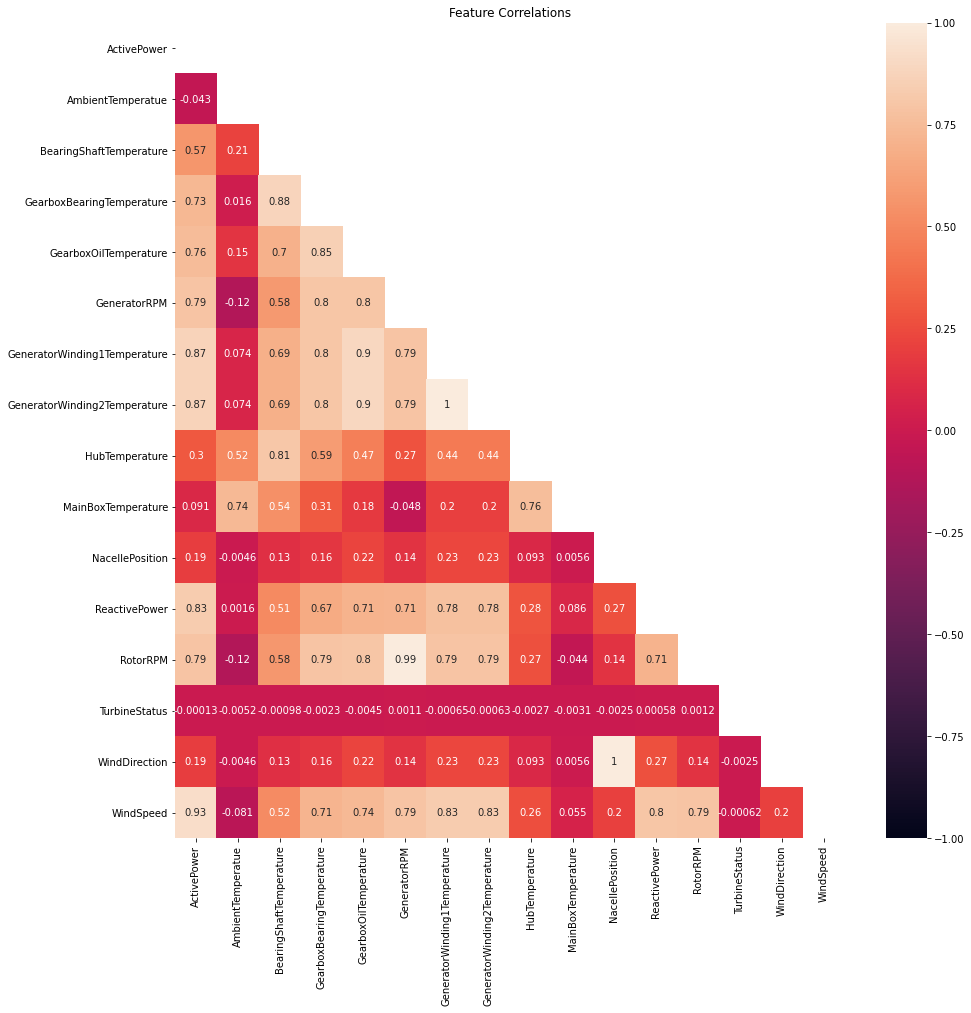

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Check for correlations with the dependent variable
matrix1 = np.triu(df.corr())
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, vmax=1, vmin=-1, mask=matrix1)
plt.title("Feature Correlations")
plt.show()

In [58]:
columns = ['DateTime', 'ActivePower', 'WindSpeed', 'RotorRPM', 'ReactivePower', 'GeneratorWinding1Temperature', 'GeneratorWinding2Temperature', 'GeneratorRPM', 'GearboxBearingTemperature', 'GearboxOilTemperature']

data = df[columns].copy()

In [59]:
# Check the significance of the correlation coefficient with a t-test
def corr_coef(x, y):
    '''It returns the correlation coefficient for two given series'''

    x_mean = np.mean(x)
    y_mean = np.mean(y)

    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sqrt(np.sum((x - x_mean) * (x - x_mean))) * np.sqrt(np.sum((y - y_mean) * (y - y_mean)))

    r = numerator / denominator

    return r


def t_value(n, r, k):
    '''It returns the critical t-value'''

    num = n -2 - k
    den = 1 - (r ** 2)

    t_value = r * np.sqrt(num / den)

    return t_value


var = ['ActivePower', 'WindSpeed', 'RotorRPM', 'ReactivePower', 'GeneratorWinding1Temperature', 
       'GeneratorWinding2Temperature', 'GeneratorRPM', 'GearboxBearingTemperature', 'GearboxOilTemperature']

for i in var:
  for j in var:
    if i != j:
      corr = corr_coef(data[i], data[j])
      t = t_value(len(data), corr, 1)

      print('Correlation coefficient {} and {}: {}'.format(i, j, round(corr, 3)))
      print('T-value of {} and {}: {}'.format(i, j, round(t)))
      print(' ')
      print('--'*12)
      print(' ')


Correlation coefficient ActivePower and WindSpeed: 0.929
T-value of ActivePower and WindSpeed: 734.0
 
------------------------
 
Correlation coefficient ActivePower and RotorRPM: 0.791
T-value of ActivePower and RotorRPM: 378.0
 
------------------------
 
Correlation coefficient ActivePower and ReactivePower: 0.835
T-value of ActivePower and ReactivePower: 442.0
 
------------------------
 
Correlation coefficient ActivePower and GeneratorWinding1Temperature: 0.869
T-value of ActivePower and GeneratorWinding1Temperature: 513.0
 
------------------------
 
Correlation coefficient ActivePower and GeneratorWinding2Temperature: 0.87
T-value of ActivePower and GeneratorWinding2Temperature: 515.0
 
------------------------
 
Correlation coefficient ActivePower and GeneratorRPM: 0.792
T-value of ActivePower and GeneratorRPM: 379.0
 
------------------------
 
Correlation coefficient ActivePower and GearboxBearingTemperature: 0.728
T-value of ActivePower and GearboxBearingTemperature: 310.0


In [60]:
# Many of the features are correlated to each other. This is a common problem in data science and it is called “multicollinearity”.
# In an ideal case features should be independent of each other. We will do Principal Components Analysis (PCA) to eliminate redundant feature.
# Per the (PCA) result the least important features will be eliminated. This feature elimination step is important because using highly correlated feature 
# in multiple regression model can cause inaccurate results.  

features = ['WindSpeed', 'RotorRPM', 'ReactivePower', 'GeneratorWinding1Temperature', 
       'GeneratorWinding2Temperature', 'GeneratorRPM', 'GearboxBearingTemperature', 'GearboxOilTemperature']

# Separate data into Y and X 
y = data['ActivePower']
X = data[features]

In [61]:
# Take the matrix of independent variables X and, for each column, subtract the mean of that column from each entry. 
# (This ensures that each column has a mean of zero.)
X.mean()

X = X - X.mean()

In [62]:
# Normalize X
Z = X / X.std()

In [63]:
# Check that the mean = 0 and the standard deviation = 1
print('MEAN:')
print(Z.mean())
print('---'*15)
print('STD:')
print(Z.std())

MEAN:
WindSpeed                      -2.748166e-13
RotorRPM                       -3.202617e-13
ReactivePower                   6.740396e-14
GeneratorWinding1Temperature    8.343680e-14
GeneratorWinding2Temperature    4.315093e-13
GeneratorRPM                   -6.762472e-14
GearboxBearingTemperature       2.111628e-13
GearboxOilTemperature           4.562602e-13
dtype: float64
---------------------------------------------
STD:
WindSpeed                       1.0
RotorRPM                        1.0
ReactivePower                   1.0
GeneratorWinding1Temperature    1.0
GeneratorWinding2Temperature    1.0
GeneratorRPM                    1.0
GearboxBearingTemperature       1.0
GearboxOilTemperature           1.0
dtype: float64


In [64]:
# Take the matrix Z, transpose it, and multiply the transposed matrix by Z.
# This is the covariance matrix of Z
Z = np.dot(Z.T, Z)

In [66]:
# w is assigned an array of computed eigenvalues.
# v is assigned the matrix whose columns are the normalized eigenvectors corresponding to the eigenvalues in that order.
eigenvalues, eigenvectors = np.linalg.eig(Z)

In [71]:
D = np.diag(eigenvalues)
P = eigenvectors

In [72]:
eigenvalues

array([5.64051743e+05, 3.90442921e+04, 3.51200405e+04, 1.93483215e+04,
       1.47307352e+04, 8.14851638e+03, 6.08578703e+02, 2.11772492e+02])

In [74]:
# Calculate Z* = ZP*. This new matrix, Z*, is a centered/standardized version of X 
# but now each observation is a combination of the original variables, where the weights are determined by the eigenvector.
Z_new = np.dot(Z, P)

In [81]:
# How many features to keep versus how many to drop? SCREE PLOT!
#1. Calculate the proportion of variance explained by each feature
sum_eigenvalues = np.sum(eigenvalues)

prop_var = [i/sum_eigenvalues for i in eigenvalues]

#2. Calculate the cumulative variance
cum_var = [np.sum(prop_var[:i]) for i in range(len(prop_var))]


In [82]:
# Plot scree plot from PCA
x_labels = ['PC{}'.format(i+1) for i in range(len(prop_var))]

plt.plot(x_labels, prop_var, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot(x_labels, cum_var, data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend()


[0.0,
 0.8279488466544752,
 0.885260391291406,
 0.9368116848837749,
 0.9652123071415865,
 0.9868349603436225,
 0.9987958395058895,
 0.9996891476839419]